In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 18 21:47:28 2021

@author: mreza2
"""

import pandas as pd
import os
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
#from keras.layers.normalization import BatchNormalization

data_df = pd.read_csv('/content/drive/MyDrive/ECE 542 Neural Network/ProjC/raw_train_data_all_Subjects.csv')
len(data_df)

X_df = data_df.drop(['time', 'y'], axis=1)
y_df = data_df.y
n_train = round(0.7*len(data_df)/4)*4
n_test = len(data_df) - n_train

Xs = X_df.to_numpy()
ys = y_df.to_numpy()
# X_train = Xs[:n_train, :]
# y_train = ys[:n_train]
# X_test = Xs[n_train:, :]
# y_test = ys[n_train:]
# print(X_train.shape)
# print(X_test.shape)

# split a multivariate sequence into samples
def split_sequences(features,label, n_steps):
    X, y = list(), list()
    for i in range(len(features)):
        #if i % 2 == 0:
        end_ix = i + n_steps
        if end_ix > len(features):
            break
        seq_x, seq_y = features[i:end_ix], label[end_ix-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps=48
X, y = split_sequences(Xs, ys, n_steps)

train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.3, stratify=y)
#train_images, train_labels = X, y


In [ ]:
print(len(X))

1341599


In [ ]:
l_0 = (train_labels==0)
l_1 = (train_labels==1)
l_2 = (train_labels==2)
l_3 = (train_labels==3)
print(sum(l_0), sum(l_1), sum(l_2), sum(l_3))

704815 38651 51148 144505


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels), train_labels)
class_weights = {l:c for l,c in zip(np.unique(train_labels), class_weights)}
print(class_weights)

TypeError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow import keras

n_features = train_images.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
#model.add(LSTM(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(4))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




#create callback
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                            monitor='val_loss',
                            verbose=1, 
                            save_best_only=True,
                            mode='min')
callbacks = [checkpoint]

#fit the model
history = model.fit(train_images, train_labels,
                  batch_size=5000,
                  epochs=70,
                  validation_data=(test_images, test_labels),
                  callbacks=callbacks, class_weight=class_weights)




Epoch 1/70
188/188 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.7717
Epoch 00001: val_loss improved from inf to 0.34615, saving model to my_best_model.hdf5
188/188 [==============================] - 48s 235ms/step - loss: 0.4406 - accuracy: 0.7717 - val_loss: 0.3462 - val_accuracy: 0.8797
Epoch 2/70
188/188 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 0.9037
Epoch 00002: val_loss improved from 0.34615 to 0.22533, saving model to my_best_model.hdf5
188/188 [==============================] - 43s 230ms/step - loss: 0.1698 - accuracy: 0.9037 - val_loss: 0.2253 - val_accuracy: 0.9256
Epoch 3/70
188/188 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9215
Epoch 00003: val_loss improved from 0.22533 to 0.20600, saving model to my_best_model.hdf5
188/188 [==============================] - 43s 230ms/step - loss: 0.1324 - accuracy: 0.9215 - val_loss: 0.2060 - val_accuracy: 0.9327
Epoch 4/70
188/188 [=====================

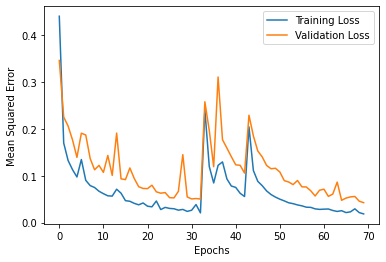

12578/12578 [==============================] - 133s 11ms/step
f1 score:  [0.99134775 0.97487526 0.97083491 0.9758408 ]
confusion matric: 
 [[297556    793   1211   2504]
 [    54  16510      0      1]
 [   100      0  21820      0]
 [   532      3      0  61396]]


In [ ]:
#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('model_training_history')
plt.show()


#Load and evaluate the best model version
model_best = load_model(filepath)
yhat = model_best.predict(test_images, verbose=1)
yhat = (np.argmax(yhat, axis=1))
cm = (confusion_matrix(test_labels, yhat))
f1 = (f1_score(test_labels, yhat, average=None))
print('f1 score: ', f1)
print('confusion matric: \n', cm)

In [2]:
a=297556+793+1211+2504+54+16510+0+1+100+21820+ 0+532 + 3    +  0 + 61396
b=297556+16510+21820+ 0+532+ 61396
b/a

0.9884068773603657

In [ ]:
len(test_labels)

In [ ]:
len(train_labels)

In [ ]:
model.save("ProjC_model")

In [ ]:
def test_data_pre(features, n_steps=48):
    X = list()
    features = np.vstack((features[0:47],features))
    for i in range(len(features)):
        if i % 4 == 0:
            end_ix = i + n_steps
            if end_ix > len(features):
                break
            seq_x = features[i:end_ix]
            X.append(seq_x)
    return np.array(X)


In [ ]:
sub_id = ['09', '10', '11', '12']
for i in sub_id:
  x_df = pd.read_csv(f'/content/drive/MyDrive/ECE 542 Neural Network/ECE542_fa2021_Project_TerrainRecognition/TestData/subject_0{i}_01__x.csv')
  x = x_df.to_numpy()
  x_test = test_data_pre(x, 48)
  ypred = model_best.predict(x_test, verbose=1)
  ypred = (np.argmax(ypred, axis=1))
  ypred = np.int8(ypred)
  # np.savetxt(f"/content/drive/MyDrive/ECE 542 Neural Network/ProjC/Test_data_pred_usingBestModel/subject_0{i}_01__y.csv", ypred, delimiter=",")
  pd.DataFrame({'y':ypred}).to_csv(f"/content/drive/MyDrive/ECE 542 Neural Network/ProjC/Test_pred_LSTM_lr/subject_0{i}_01__y.csv", index = False, header = None)

355/355 [==============================] - 4s 10ms/step


In [ ]:
type(ypred)

In [ ]:
x10_df = pd.read_csv('/content/drive/MyDrive/ECE 542 Neural Network/ECE542_fa2021_Project_TerrainRecognition/TestData/subject_010_01__x.csv')
x10 = x10_df.to_numpy()
x10_test = test_data_pre(x10, 48)
print(x10.shape)
print(x10_test.shape)

In [ ]:
x11_df = pd.read_csv('/content/drive/MyDrive/ECE 542 Neural Network/ECE542_fa2021_Project_TerrainRecognition/TestData/subject_011_01__x.csv')
x11 = x11_df.to_numpy()
x11_test = test_data_pre(x11, 48)
print(x11.shape)
print(x11_test.shape)

In [ ]:
x12_df = pd.read_csv('/content/drive/MyDrive/ECE 542 Neural Network/ECE542_fa2021_Project_TerrainRecognition/TestData/subject_012_01__x.csv')
x12 = x12_df.to_numpy()
x12_test = test_data_pre(x12, 48)
print(x12.shape)
print(x12_test.shape)

In [ ]:
x = (np.arange(54)).reshape(9,6)
x

In [ ]:

np.savetxt("/content/drive/MyDrive/ECE 542 Neural Network/ProjC/Test_data_pred/test.csv", x, delimiter=",")

In [ ]:
print(len(y))